In [77]:
import pandas as pd
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'])

In [78]:
Nifty_data['day']=Nifty_data['Date'].map(lambda x:x.day)

In [79]:
Nifty_data['month']=Nifty_data['Date'].map(lambda x:x.month)

In [80]:
Nifty_data['year']=Nifty_data['Date'].map(lambda x:x.year)

In [81]:
All_returns=list()
for i in range(2010,2019):
    for j in range(1,13):
        Open=Nifty_data.Open[(Nifty_data['year']==i) & (Nifty_data['month']==j)]
        if(Open.empty):
            continue;
        else :
            Open.index=range(1,len(Nifty_data[(Nifty_data['year']==i) & (Nifty_data['month']==j)])+1)
            returns=((Open[len(Open)]-Open[1])/Open[1])*100
            All_returns.append(returns)

In [82]:
All_mov_avg=list()
for i in range(2010,2019):
    for j in range(1,13):
        Open=Nifty_data.Open[(Nifty_data['year']==i) & (Nifty_data['month']==j)]
        if(Open.empty):
                continue;
        else:
                mov=list(Open)
                for k in range(len(mov)):
                               All_mov_avg.append(sum(mov[k:k+5])/5)

In [83]:
All_r=pd.Series(All_returns)
All_r.index=pd.date_range('Apr 2010',freq='M',periods=96).to_period()
All_r.head(10)

2010-04     0.095253
2010-05    -3.832601
2010-06     3.303023
2010-07     1.813801
2010-08     0.819436
2010-09    10.888295
2010-10    -0.151734
2010-11    -4.607455
2010-12     3.987396
2011-01   -11.734615
Freq: M, dtype: float64

In [84]:
All_mov=pd.Series(All_mov_avg)
All_mov.head(10)

0    5330.45
1    5341.09
2    5353.64
3    5347.88
4    5339.40
5    5318.82
6    5314.15
7    5284.98
8    5262.87
9    5247.93
dtype: float64

In [85]:
Nifty_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day,month,year
0,2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,1,4,2010
1,2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,5,4,2010
2,2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,6,4,2010
3,2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,7,4,2010
4,2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,8,4,2010


In [86]:
Nifty_data.index=Nifty_data['Date']

In [87]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000211773F3208>,
      dtype=object)

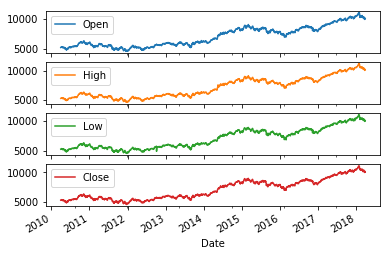

In [88]:
Nifty_data[['Open','High','Low','Close']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021177398828>,
      dtype=object)

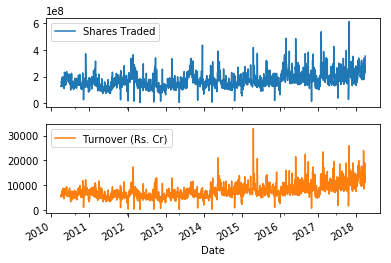

In [89]:
Nifty_data[['Shares Traded','Turnover (Rs. Cr)']].plot(subplots=True)

In [90]:
win_size=[7,30,90,365]

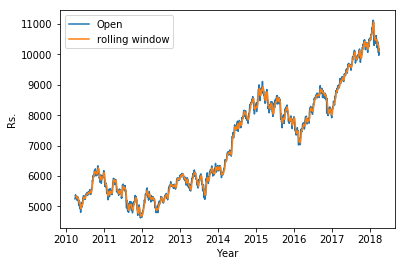

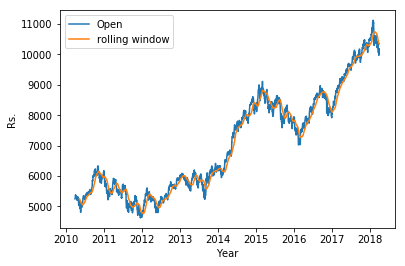

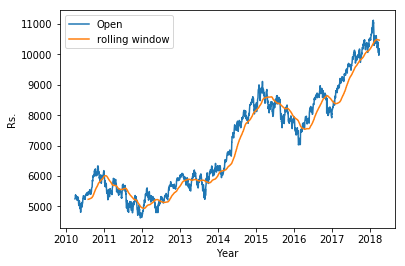

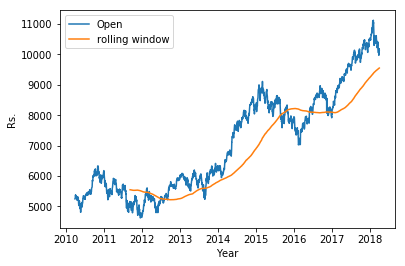

In [91]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Open']],label='Open')
    plt.plot(r1.mean()['Open'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()


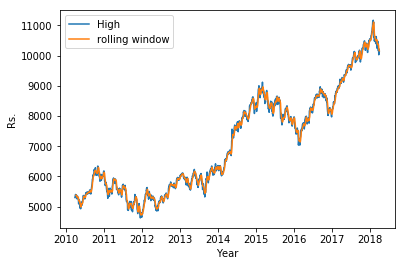

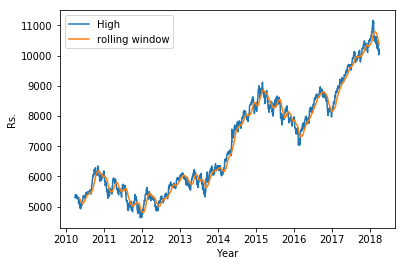

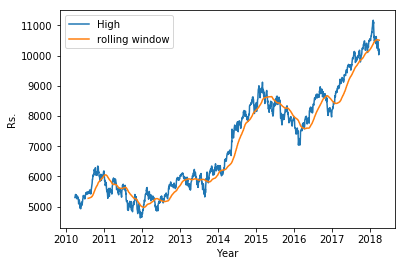

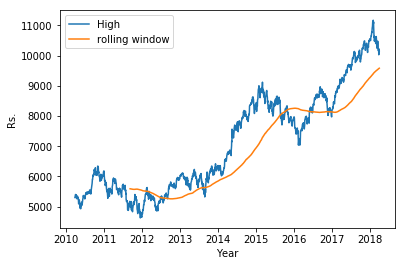

In [92]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['High']],label='High')
    plt.plot(r1.mean()['High'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

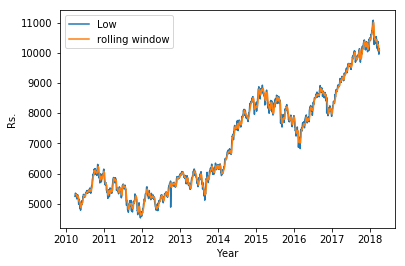

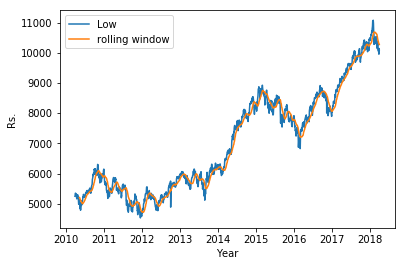

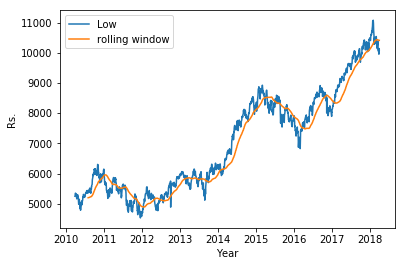

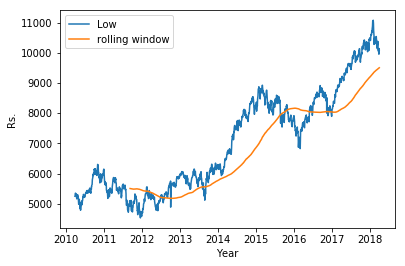

In [93]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Low']],label='Low')
    plt.plot(r1.mean()['Low'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

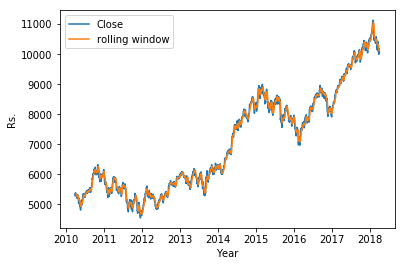

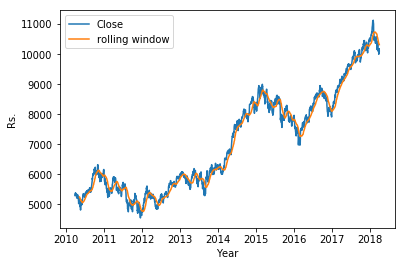

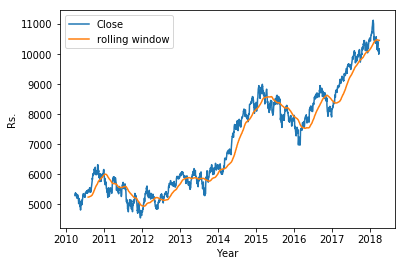

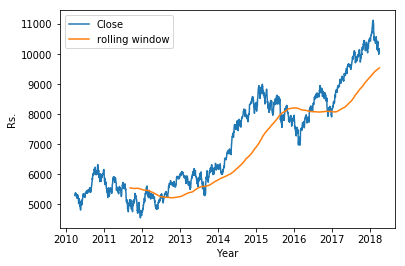

In [94]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Close']],label='Close')
    plt.plot(r1.mean()['Close'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

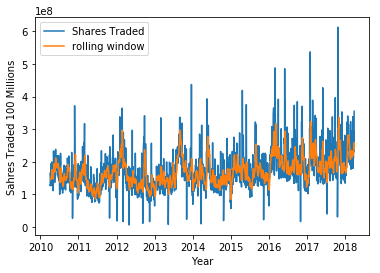

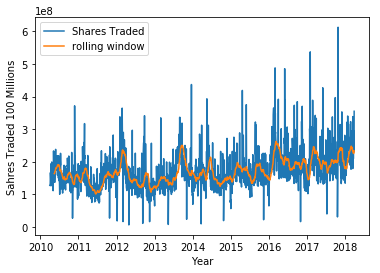

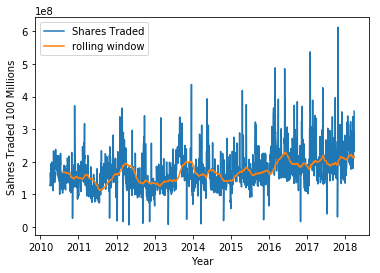

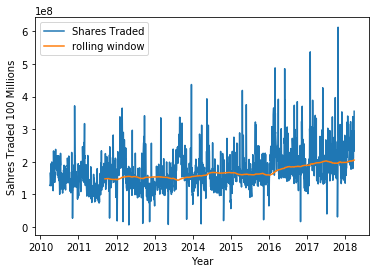

In [95]:
for i in win_size:
    r2=Nifty_data['Shares Traded'].rolling(window=i)
    plt.plot(Nifty_data['Shares Traded'])
    plt.plot(r2.mean(),label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Sahres Traded 100 Millions')
    plt.legend()
    plt.show()

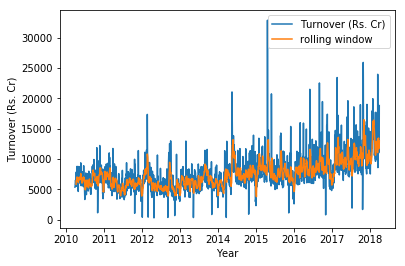

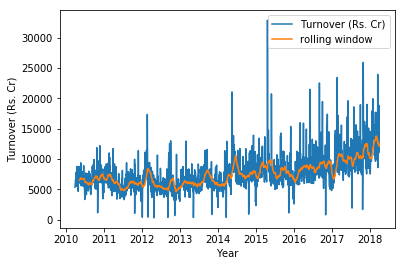

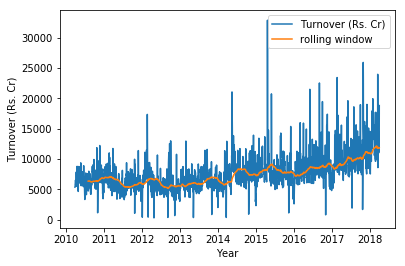

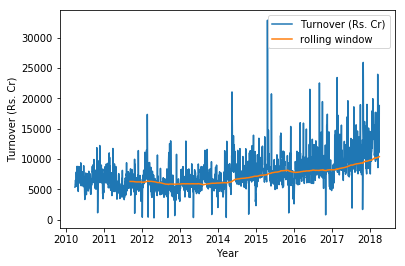

In [96]:
for i in win_size:
    r2=Nifty_data['Turnover (Rs. Cr)'].rolling(window=i)
    plt.plot(Nifty_data['Turnover (Rs. Cr)'])
    plt.plot(r2.mean(),label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Turnover (Rs. Cr)')
    plt.legend()
    plt.show()